In [589]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import scipy
import datetime
import warnings
warnings.simplefilter("ignore")
from pandas.api.types import  is_object_dtype, is_numeric_dtype
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [576]:
irrelevant_cols = ['url',
                 'id',
                 'pub_rec_bankruptcies',
                 'zip_code',
                 'emp_title',
                 'out_prncp',
                 'out_prncp_inv',
                 'member_id',
                 'title']

post_loan_approval_cols = ["last_pymnt_amnt",
                         "last_credit_pull_d",
                         "total_pymnt",
                         "total_pymnt_inv",
                         "total_rec_prncp",
                         "total_rec_int",
                         "total_rec_late_fee",
                         "recoveries",
                         "collection_recovery_fee",
                         "last_pymnt_d",
                         'delinq_2yrs', 
                         'earliest_cr_line',
                         'inq_last_6mths',
                         'open_acc', 
                         'pub_rec']

In [582]:
df_loan = pd.read_csv("../input files/loan/loan.csv")
df_loan.head(4)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [56]:
for col in sorted(df_loan.columns):
    if is_numeric_dtype(df_loan[col]):
        print(f"{col} --> {df_loan[col].nunique()}")

acc_now_delinq --> 1
acc_open_past_24mths --> 0
all_util --> 0
annual_inc --> 5318
annual_inc_joint --> 0
avg_cur_bal --> 0
bc_open_to_buy --> 0
bc_util --> 0
chargeoff_within_12_mths --> 1
collection_recovery_fee --> 2616
collections_12_mths_ex_med --> 1
delinq_2yrs --> 11
delinq_amnt --> 1
dti --> 2868
dti_joint --> 0
funded_amnt --> 1041
funded_amnt_inv --> 8205
id --> 39717
il_util --> 0
inq_fi --> 0
inq_last_12m --> 0
inq_last_6mths --> 9
installment --> 15383
last_pymnt_amnt --> 34930
loan_amnt --> 885
max_bal_bc --> 0
member_id --> 39717
mo_sin_old_il_acct --> 0
mo_sin_old_rev_tl_op --> 0
mo_sin_rcnt_rev_tl_op --> 0
mo_sin_rcnt_tl --> 0
mort_acc --> 0
mths_since_last_delinq --> 95
mths_since_last_major_derog --> 0
mths_since_last_record --> 111
mths_since_rcnt_il --> 0
mths_since_recent_bc --> 0
mths_since_recent_bc_dlq --> 0
mths_since_recent_inq --> 0
mths_since_recent_revol_delinq --> 0
num_accts_ever_120_pd --> 0
num_actv_bc_tl --> 0
num_actv_rev_tl --> 0
num_bc_sats --> 0
n

In [325]:
pd.DataFrame(np.round(df_loan.isna().sum()/df_loan.shape[0] * 100, 2), columns = ['null_value_percentage']).reset_index().rename(columns = {'index': 'columns'})

,columns,null_value_percentage
0,id,0.00
1,member_id,0.00
2,loan_amnt,0.00
3,funded_amnt,0.00
4,funded_amnt_inv,0.00
5,term,0.00
6,int_rate,0.00
7,installment,0.00
8,grade,0.00
9,sub_grade,0.00


In [583]:
def preprocess_data(df):
    """This function preprocesses the input data
    Steps:
    - Remove observations where the loan status is 'Current'
    - Convert numeric columns which were flagged as object dtype
    - Strip categorical columns off whitespaces
    - Remove columns with only 1 unique value
    - Remove columns with more than 30% null values
    - Remove columns which are irrelevant to the problem statement
    - Remove rows with more than 60% null values
    
    :args: df -> pd.DataFrame()
    
    :returns: pd.DataFrame()
    
    """
    df = df.copy()
    df = df[~df['loan_status'].str.contains('Current')]
    
    for col in df.columns.tolist():
        if is_object_dtype(df[col]):
            df[col] = df[col].str.strip(" ")
            df[col] = df[col].str.strip("%")
        if df[col].nunique() == 1:
            df.drop(col, axis= 1, inplace = True)
    
    df['term'] = df['term'].apply(lambda x: x.strip("months").strip(" "))
    df['term'] = df['term'].astype(int)
    df['int_rate'] = df['int_rate'].astype(float)
    df['revol_util'] = df['revol_util'].astype(float)
    columns_to_keep = df.columns[df.isna().sum()/df.shape[0] * 100 <= 30]
    df = df[columns_to_keep]   
    
    df = df.drop(irrelevant_cols, axis = 'columns', errors = 'ignore')
    df = df.drop(post_loan_approval_cols, axis = 'columns', errors = 'ignore')
    df = df.dropna(thresh = 0.6 * df.shape[1])
    return df

def create_boxplot(data, x, y, hue = 'loan_status', figsize = (20, 6), sort = False):
    """Function for plotting boxpots
    """
    if sort:
        data = data.sort_values(by = x, ascending = True)
    plt.figure(figsize = figsize)
    sns.boxplot(data = data, x= x, y = y, hue = hue)
    plt.grid()
    plt.suptitle(f"Boxplot : {x} vs. {y}", fontsize = 20)
    plt.xticks(rotation = 10)
    plt.show()

In [584]:
df_preprocessed = preprocess_data(df_loan)
df_preprocessed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_bal,revol_util,total_acc
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,13648,83.7,9
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,1687,9.4,4
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2956,98.5,10
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,5598,21.0,37
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,7963,28.3,12


In [587]:
df_preprocessed.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'dti',
 'revol_bal',
 'revol_util',
 'total_acc']

In [539]:
df_preprocessed['emp_length']

0        10.0
1         1.0
2        10.0
3        10.0
5         3.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 38577, dtype: float64

In [535]:
import re

In [588]:
df_preprocessed['emp_length'] = df_preprocessed['emp_length'].fillna("99")

In [559]:
df_preprocessed['emp_length'] = df_preprocessed['emp_length'].apply(lambda x: re.findall(r'\d+', x)[0])
df_preprocessed['emp_length'] = df_preprocessed['emp_length'].astype(int)
df_preprocessed['emp_length'] = df_preprocessed['emp_length'].replace(99, np.nan)

In [538]:
df_preprocessed.shape

(38577, 25)

In [541]:
d = df_preprocessed[~df_preprocessed['emp_length'].isna()]
d['emp_length'].corr(d['annual_inc']/12)

0.11110734153331445

<AxesSubplot:xlabel='emp_length', ylabel='annual_inc'>

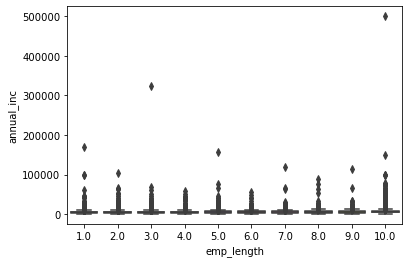

In [543]:
sns.boxplot(x = d['emp_length'], y = d['annual_inc']/12)

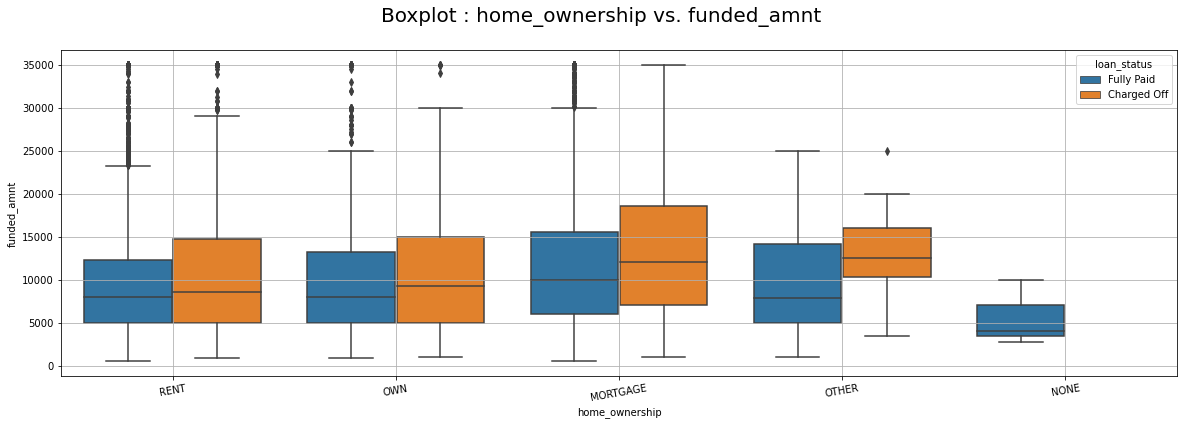

In [37]:
create_boxplot(data = df_preprocessed, x = 'home_ownership', y = 'funded_amnt', hue = 'loan_status')

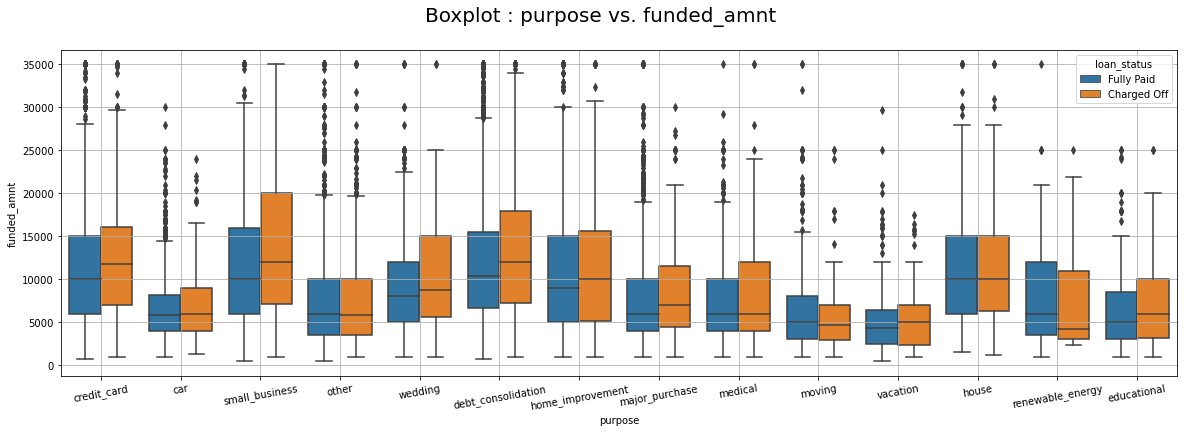

In [38]:
create_boxplot(data = df_preprocessed, x = 'purpose', y = 'funded_amnt', hue = 'loan_status')

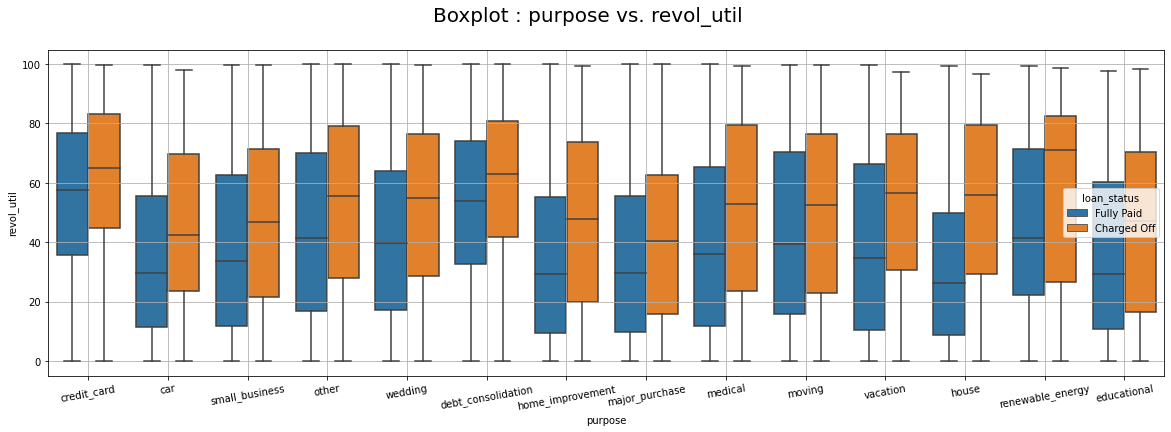

In [39]:
create_boxplot(data = df_preprocessed, x = 'purpose', y = 'revol_util', hue = 'loan_status')

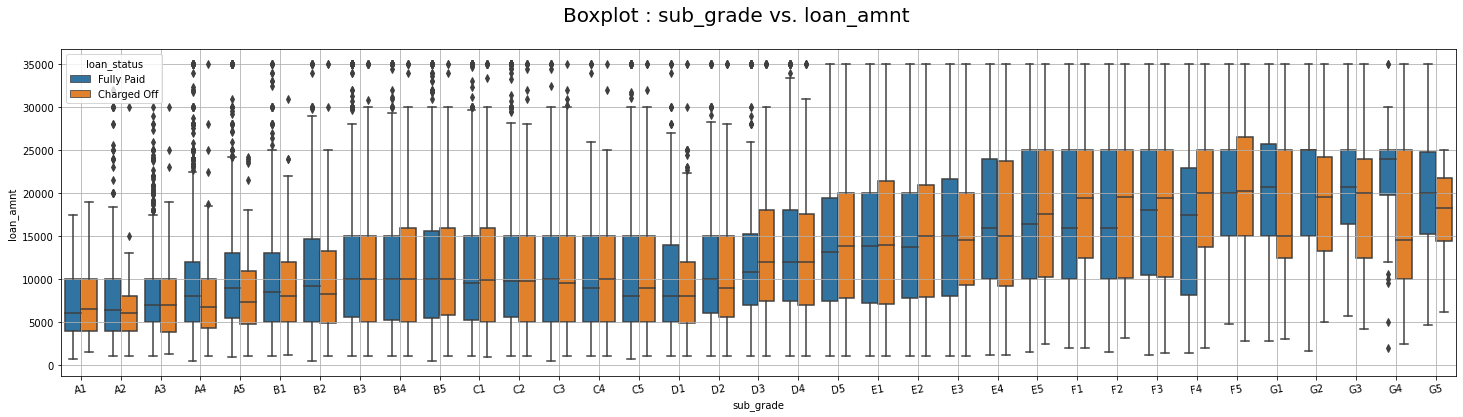

In [40]:
create_boxplot(data = df_preprocessed, 
               x = 'sub_grade', 
               y = 'loan_amnt', 
               hue = 'loan_status', 
               figsize = (25, 6), 
               sort = True)

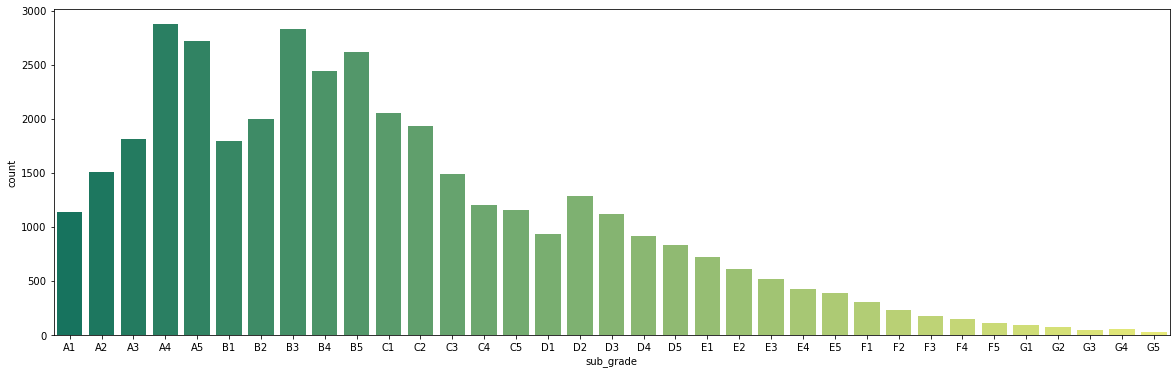

In [41]:
plt.figure(figsize = (20, 6))
sns.countplot(data = df_preprocessed.sort_values(by = 'sub_grade'), x = 'sub_grade', palette = 'summer')
plt.show()

In [42]:
df_preprocessed['issue_d'] = pd.to_datetime(df_preprocessed['issue_d'], format = "%b-%y")
df_preprocessed = df_preprocessed.sort_values(by = 'issue_d', ascending = True)
df_ts = df_preprocessed.groupby(["issue_d", "loan_status"], as_index = False).agg({"funded_amnt": ['mean', 'count']})
df_ts.columns = ["_".join(x).rstrip("_") for x in df_ts.columns.ravel()]

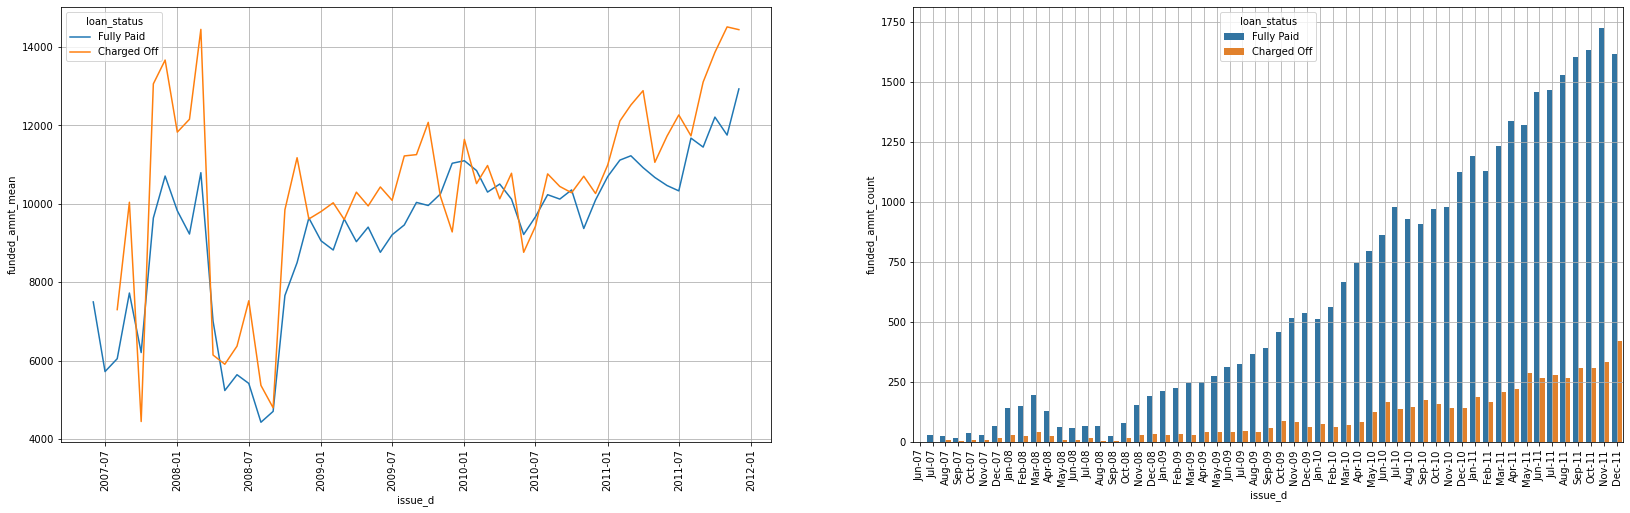

In [43]:
fig, axs = plt.subplots(1, 2, figsize = (28,8))

sns.lineplot(data = df_ts, x = 'issue_d', y = 'funded_amnt_mean', hue = 'loan_status', ax = axs[0])
sns.barplot(data = df_ts, x = df_ts['issue_d'].dt.strftime("%b-%y"), y = 'funded_amnt_count', hue = 'loan_status', ax = axs[1])

axs[0].grid()
axs[1].grid()
axs[0].tick_params(axis = 'x', labelrotation = 90)
axs[1].tick_params(axis='x', labelrotation=90)

### Transformations and Analysis on Funded Cost Inv

In [60]:
df_preprocessed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16


In [560]:
df_preprocessed['loan_to_income_ratio'] = df_preprocessed['funded_amnt_inv']/df_preprocessed['annual_inc']
df_preprocessed['installment_to_income_ratio'] = df_preprocessed['installment']/(df_preprocessed['annual_inc']/12)

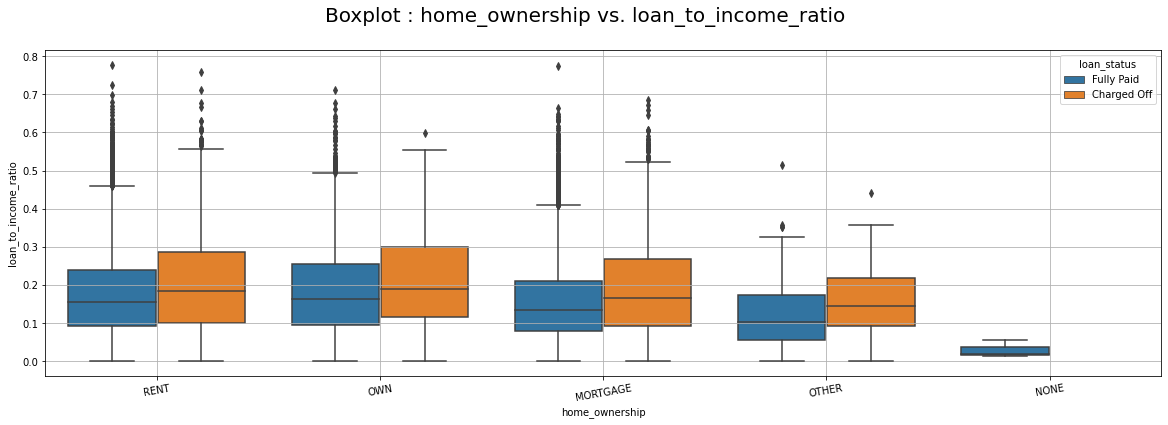

In [66]:
create_boxplot(data = df_preprocessed, x = 'home_ownership', y = 'loan_to_income_ratio', hue = 'loan_status')

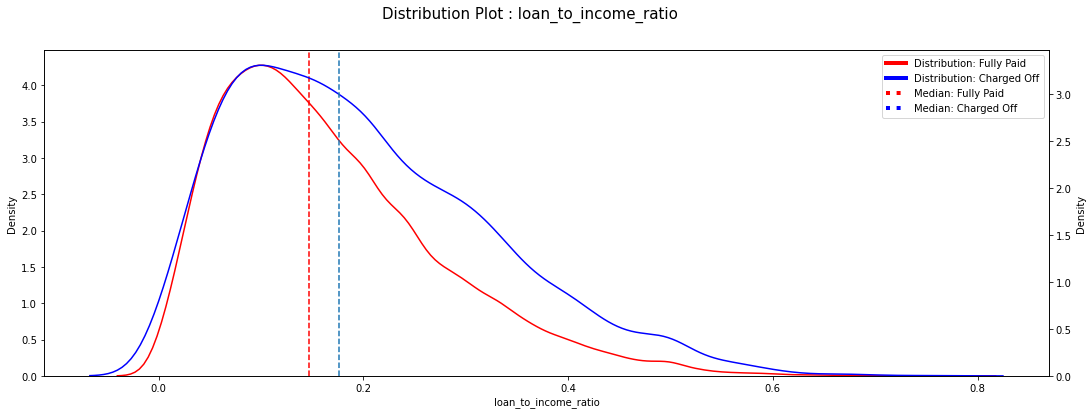

In [209]:
plot_distribution(df_preprocessed, "loan_to_income_ratio",)

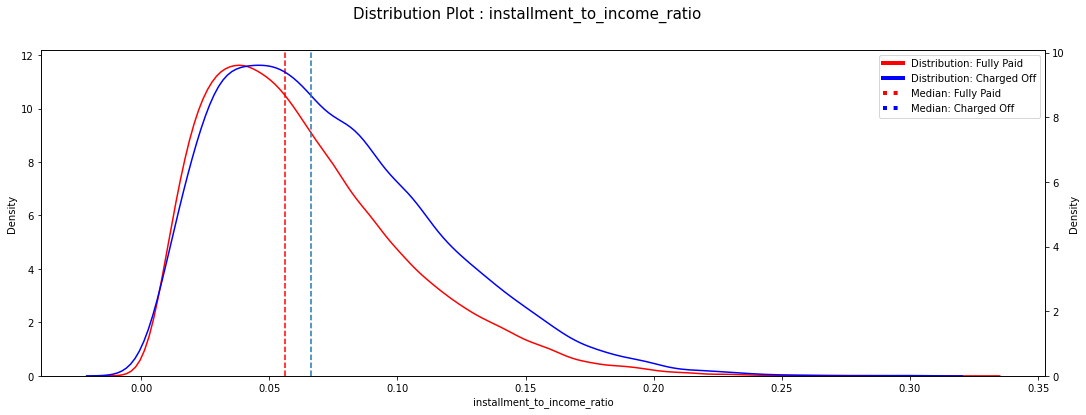

In [198]:
plot_distribution(df_preprocessed, "installment_to_income_ratio",)

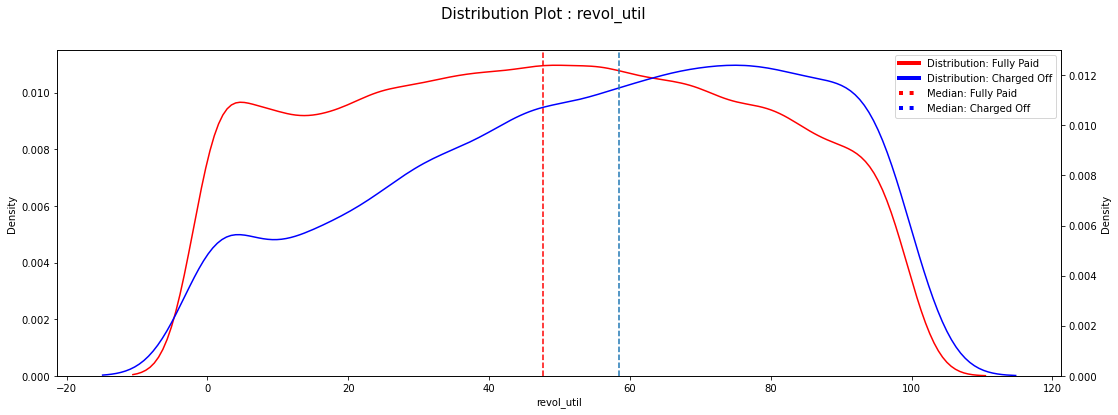

In [199]:
plot_distribution(df_preprocessed, "revol_util",)

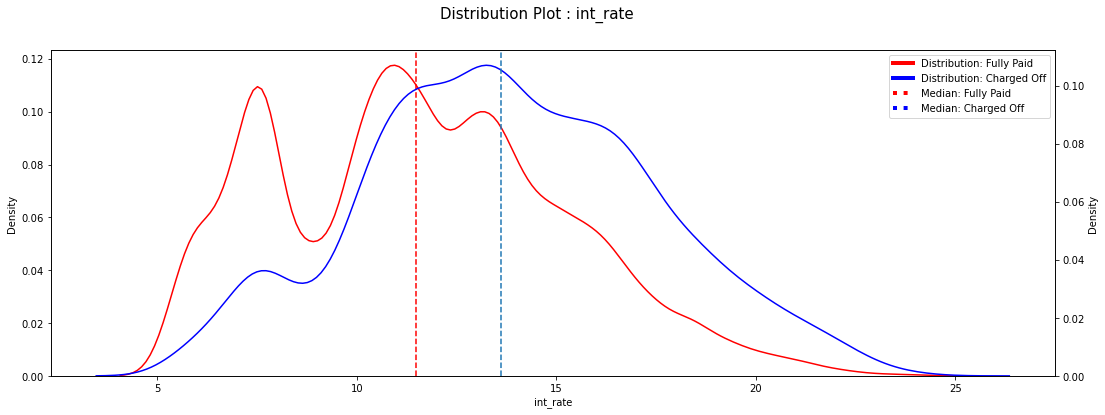

In [217]:
plot_distribution(df_preprocessed, "int_rate",)

In [237]:
df_preprocessed['income bucket'] = np.where(df_preprocessed['annual_inc'] < 10000, "0-10K",
                                           np.where(df_preprocessed['annual_inc'] < 20000, "10-20K",
                                                   np.where(df_preprocessed['annual_inc']< 30000, "20-30K",
                                                           np.where(df_preprocessed['annual_inc']< 40000, "30-40K",
                                                                   np.where(df_preprocessed['annual_inc']<50000, "40-50K",
                                                                           np.where(df_preprocessed['annual_inc']<60000, "50-60K", "60K+"))))))

In [423]:
def __helper__bin_data(data, bucket_column, multiplot_column):
    if not multiplot_column:
        inc_columns = [bucket_column, "loan_status"]
        total_columns = [bucket_column]
        merge_columns = [bucket_column]
    else:
        inc_columns = [bucket_column, multiplot_column, "loan_status"]
        total_columns = [bucket_column, multiplot_column]
        merge_columns = [bucket_column, multiplot_column]
    df_inc = data.groupby(inc_columns, as_index = False).size()
    df_total = data.groupby(total_columns, as_index = False).size()
    df_inc_merged = df_inc.merge(df_total.rename(columns = {"size": "total_size"}), on = merge_columns, how = 'left')
    df_inc_merged['percentage_count'] = df_inc_merged['size']/df_inc_merged['total_size'] * 100
    return df_inc_merged


def __helper__dual_plot(data, binning_column, row, multiplot_column = None):
    data = data.copy()
    if row == None:
        ax1 = axis1[0]
        ax2 = axis1[1]
    else:
        ax1 = axis2[row, 0]
        ax2 = axis2[row, 1]
    if multiplot_column:
        title_text = f"_{multiplot_column} = {data[multiplot_column].iloc[0]}"
    else:
        title_text = ""
#     print(ax1, ax2)
    data.pivot_table(index = 'bins', columns = "loan_status", values = "percentage_count").plot(kind = "bar", stacked = True, ax = ax1)
    sns.barplot(data = data, x = "bins", y = "size", hue = "loan_status", ax = ax2)
    
    ax1.set_title("Stacked Bar Plot: Percentage Count" + title_text)
    ax2.set_title("Side by Side Barplot: Absolute Count"+ title_text)
    
    ax1.set_xlabel(f"{binning_column} bins")
    ax2.set_xlabel(f"{binning_column} bins")
    
    ax1.set_ylabel("Percentage Count")
    ax2.set_ylabel("Count")
    
    ax1.legend(loc = "best")
    ax2.legend(loc = "best")
    
    ax1.tick_params(rotation = 25)
    ax2.tick_params(rotation = 25)


def plot_binned_data(data, binning_column = "annual_inc", bins = 5, return_data = False, return_plots = True, multiplot_column = None):
    data = data.copy()
    data['bins'] = pd.qcut(data[binning_column], q = bins)
    data_binned = __helper__bin_data(data, "bins", multiplot_column)
    if return_plots:
        if multiplot_column == None:
            global axis1
            figure, axis1 = plt.subplots(1,2, figsize = (25, 6))
            
            plt.suptitle(f"Barplot: {binning_column} with {bins} bins", fontsize = 15)

            __helper__dual_plot(data_binned, binning_column, row = None)
        else:
            
            nrows = data_binned[multiplot_column].nunique()
            global axis2
            figure, axis2 = plt.subplots(nrows,2, figsize = (25, nrows * 9))
            plt.suptitle(f"Barplot: {binning_column} with {bins} bins", fontsize = 15)
            
            for index, value in enumerate(sorted(data_binned[multiplot_column].unique().tolist())):
                data_ = data_binned[data_binned[multiplot_column] == value]
                
                __helper__dual_plot(data_, binning_column, row = index, multiplot_column = multiplot_column)

        plt.show()
    if return_data:
        return data_binned
    


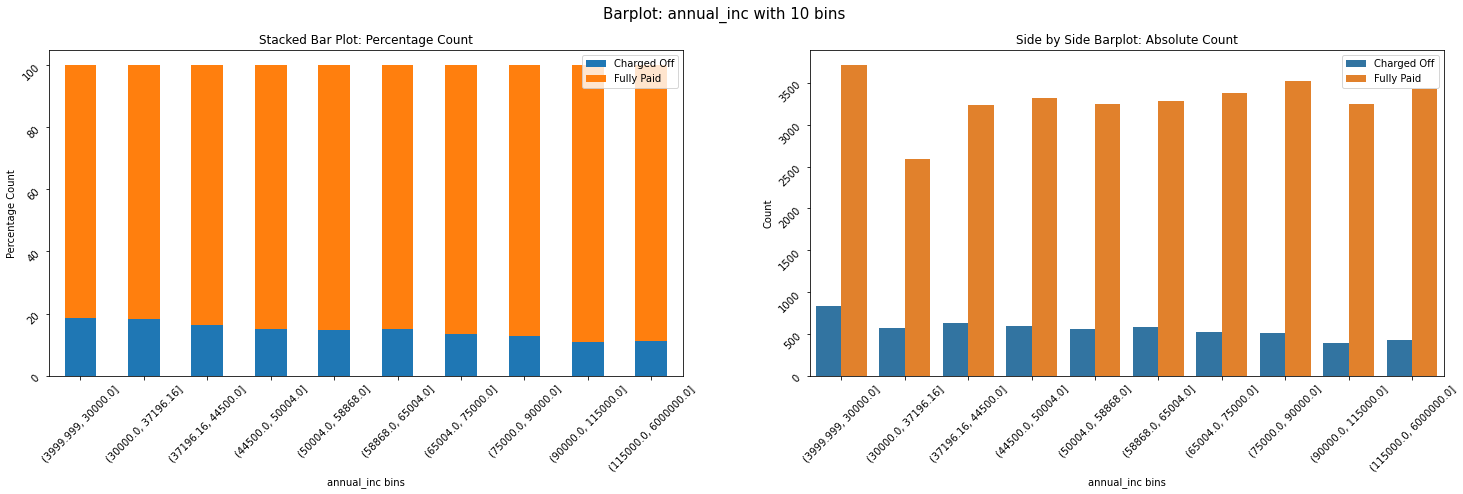

In [338]:
plot_binned_data(data = df_preprocessed, bins = 10, binning_column = "annual_inc")

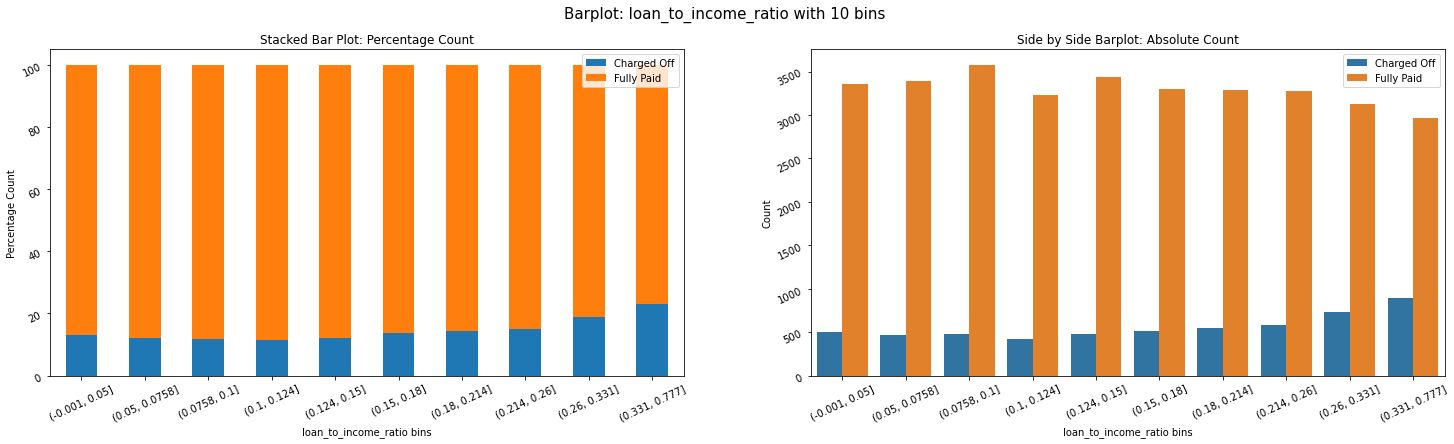

In [421]:
plot_binned_data(data = df_preprocessed, bins = 10, binning_column = "loan_to_income_ratio")

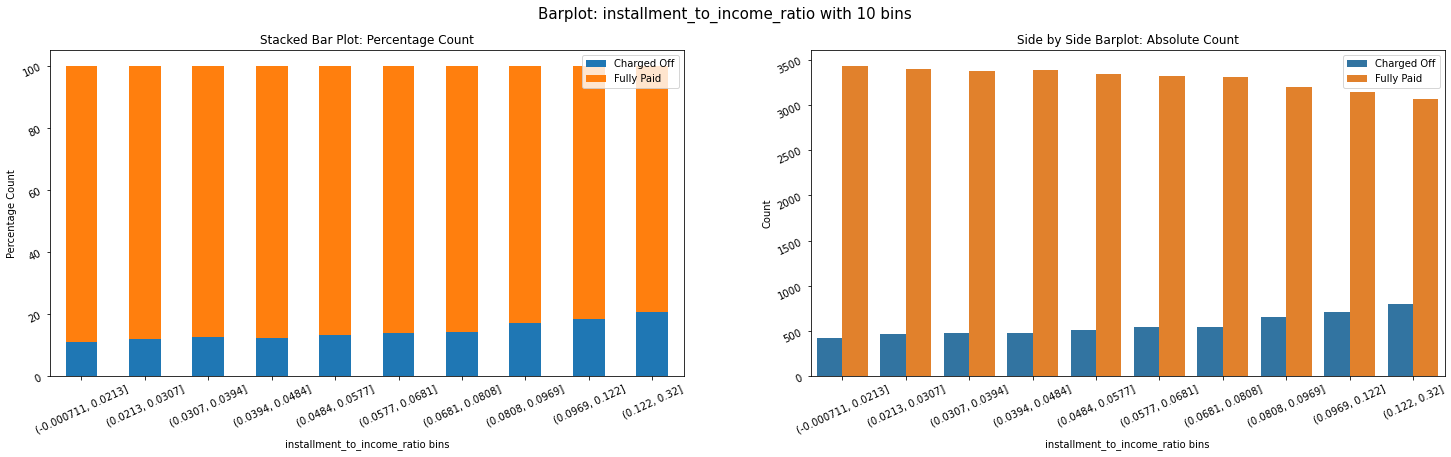

In [422]:
plot_binned_data(data = df_preprocessed, bins = 10, binning_column = "installment_to_income_ratio")

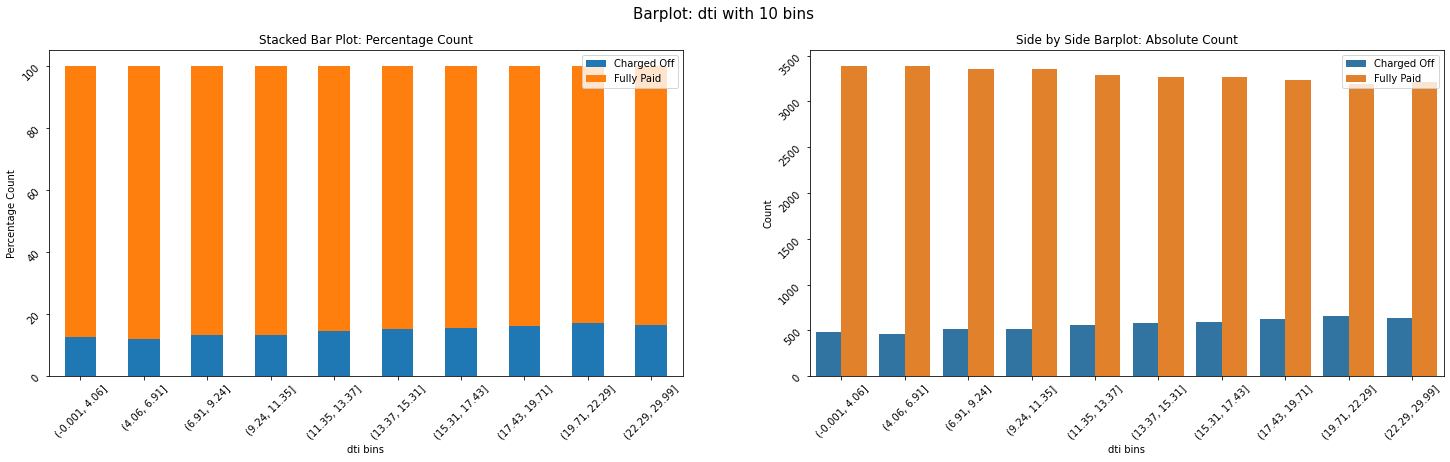

In [341]:
plot_binned_data(data = df_preprocessed, bins = 10, binning_column = "dti")

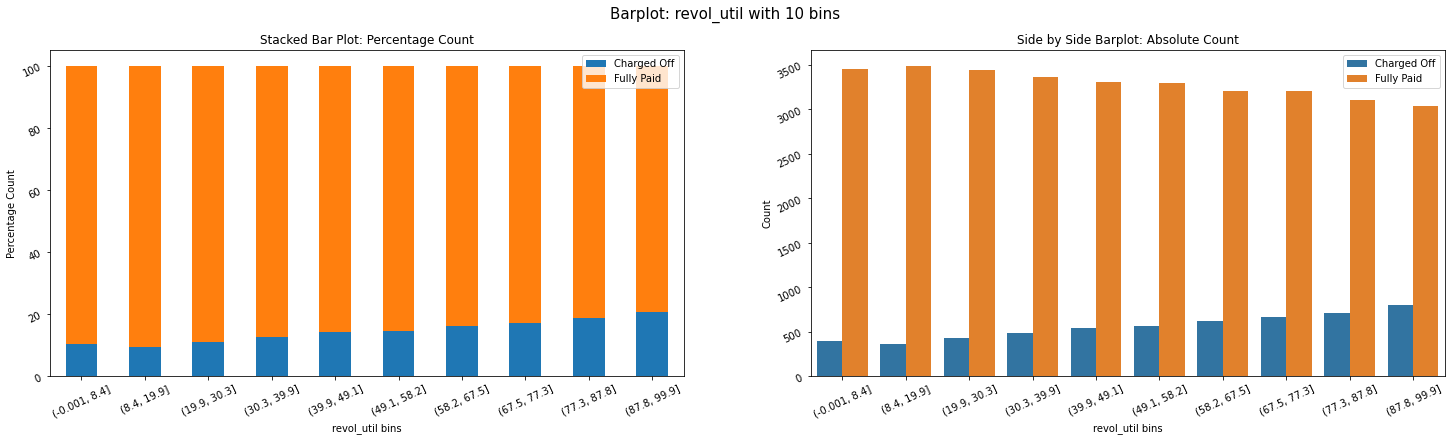

In [425]:
plot_binned_data(data = df_preprocessed, bins = 10, binning_column = "revol_util")

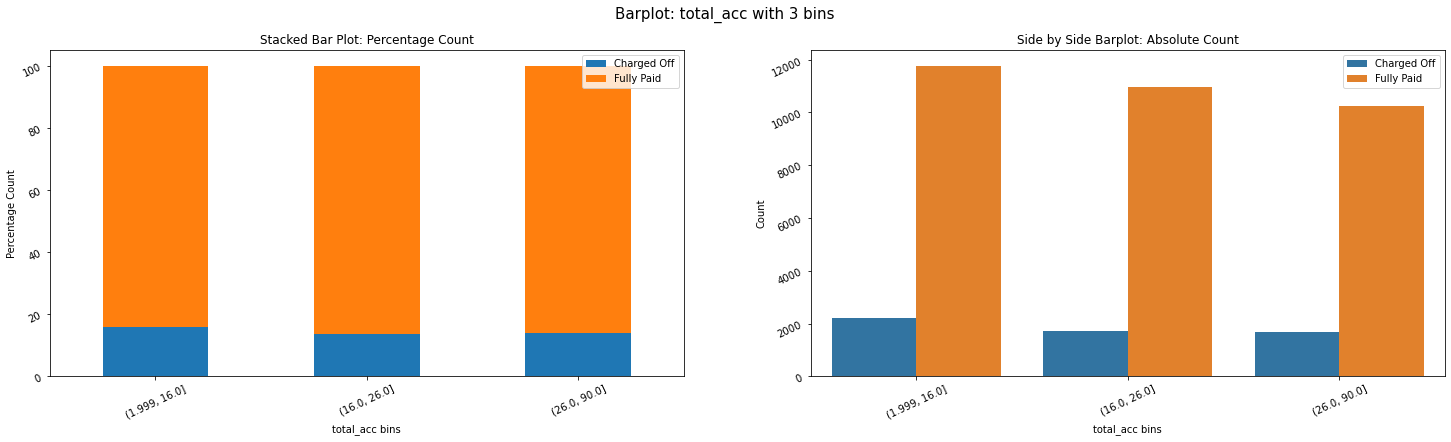

In [545]:
plot_binned_data(data = df_preprocessed, bins = 3, binning_column = "total_acc")

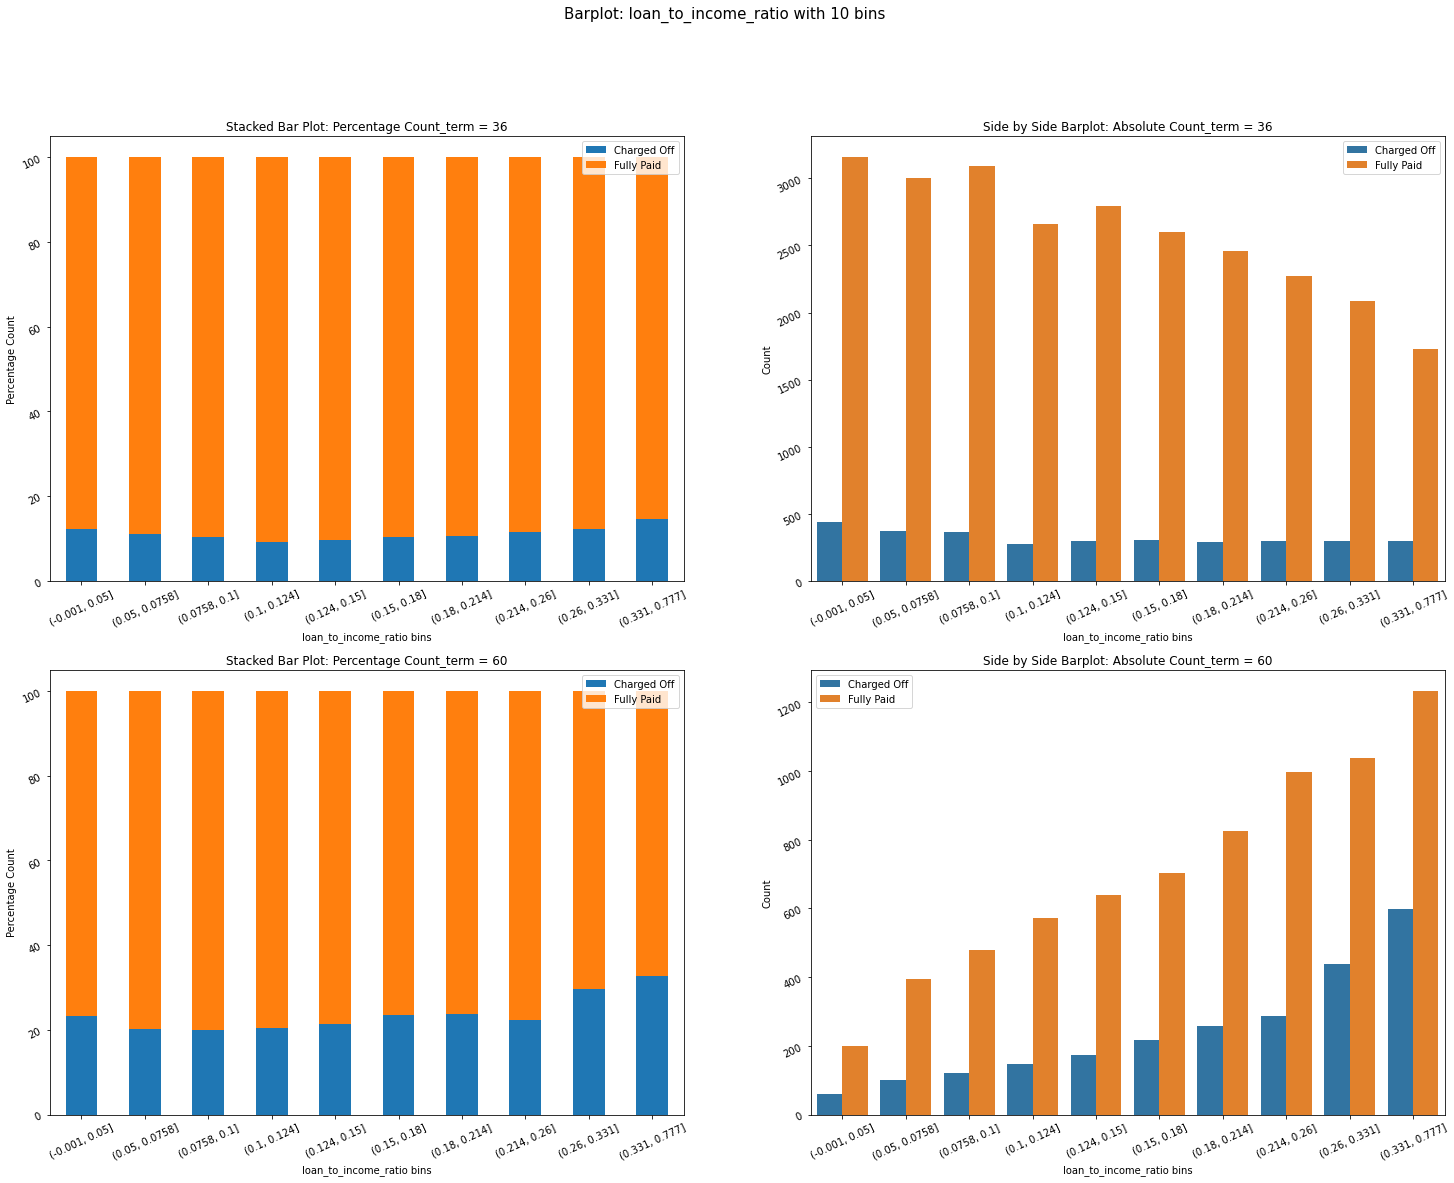

In [427]:
plot_binned_data(data = df_preprocessed, 
                 bins = 10, 
                 binning_column = "loan_to_income_ratio", 
                 multiplot_column="term")


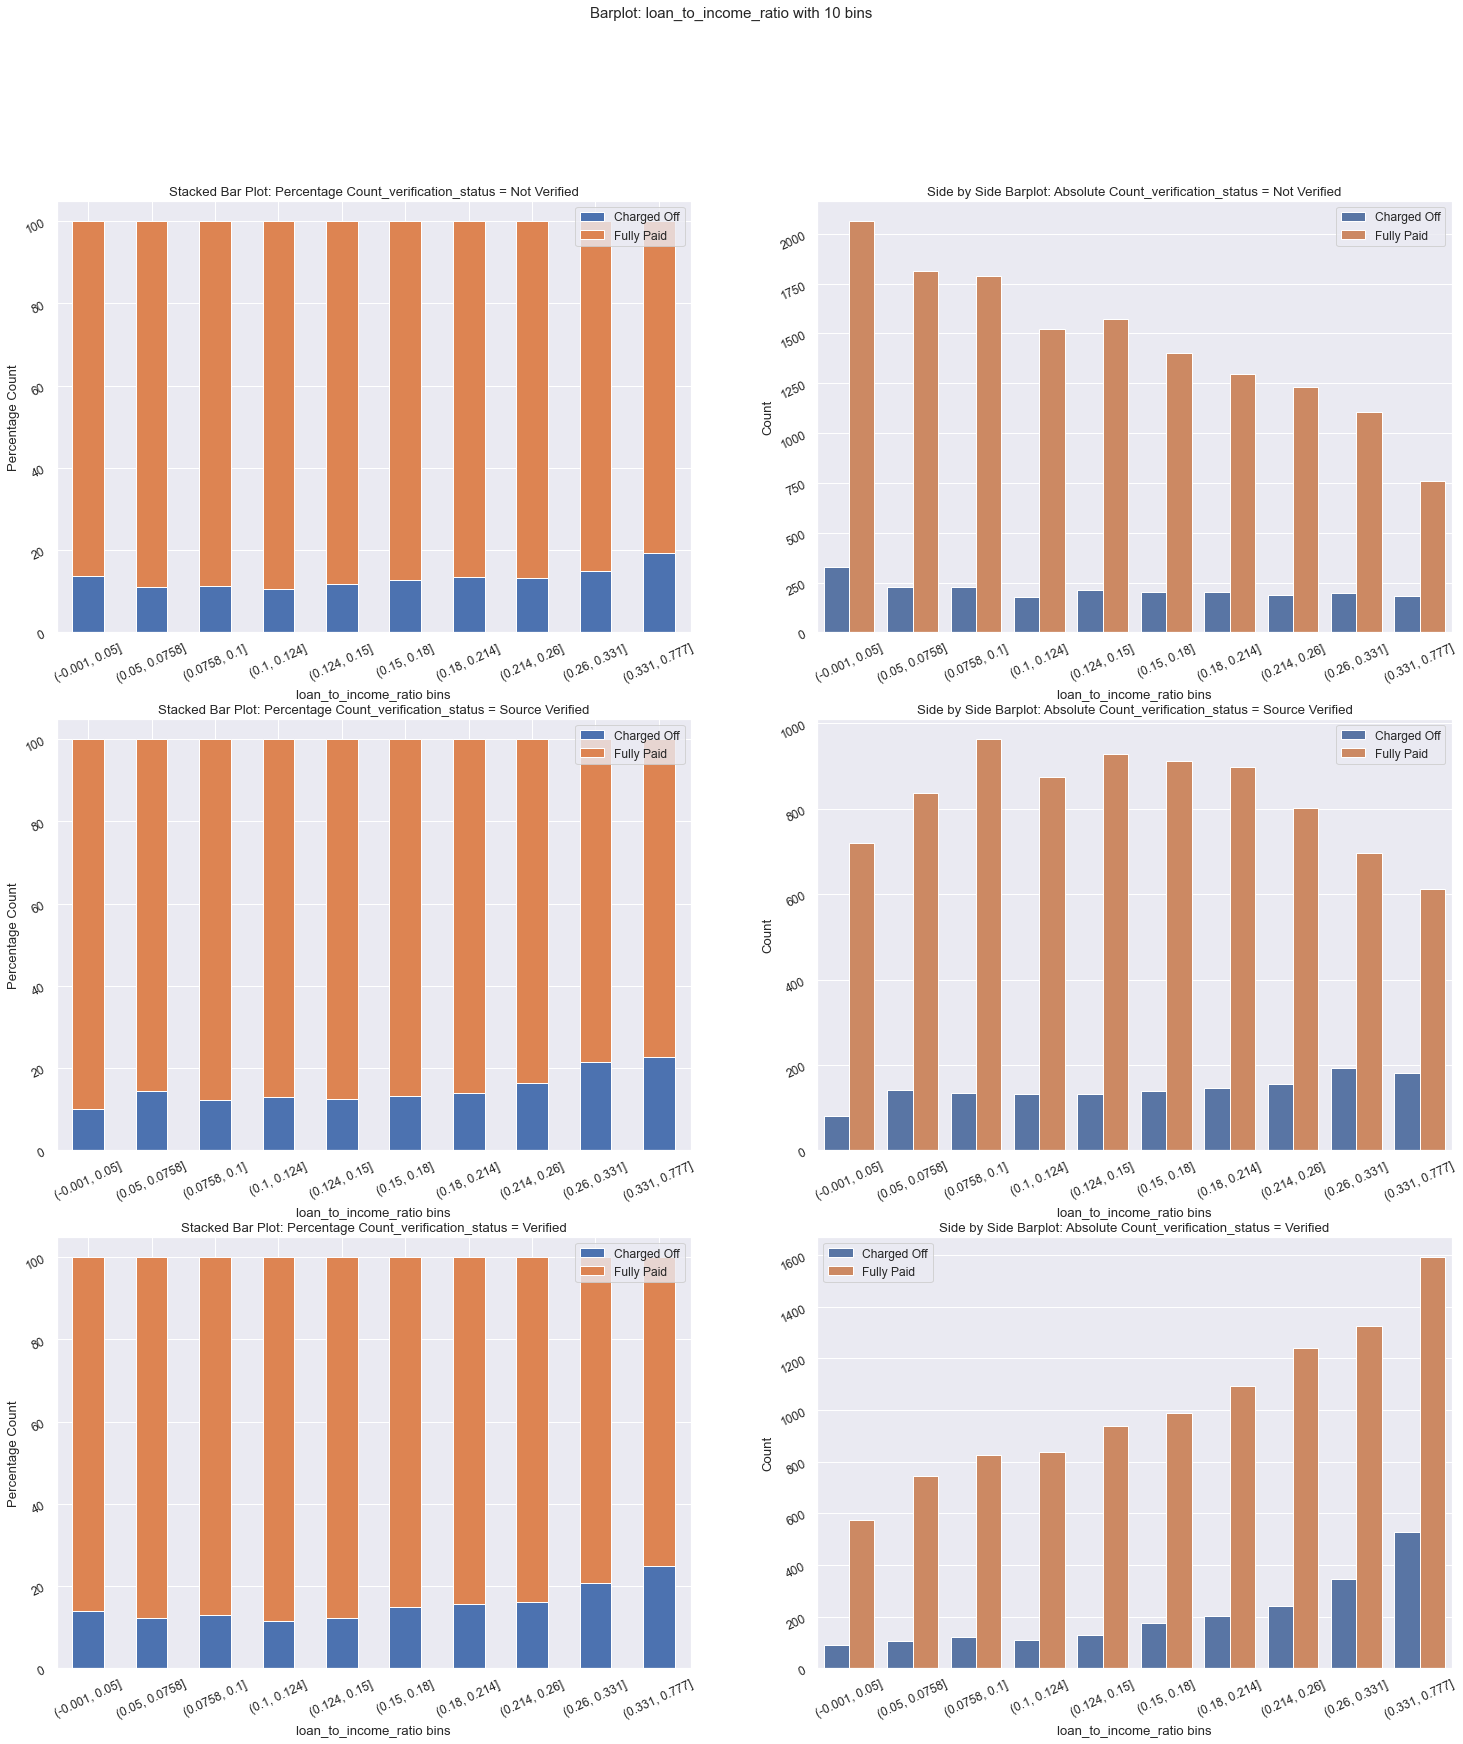

In [579]:
plot_binned_data(data = df_preprocessed, 
                 bins = 10, 
                 binning_column = "loan_to_income_ratio", 
                 multiplot_column="verification_status")

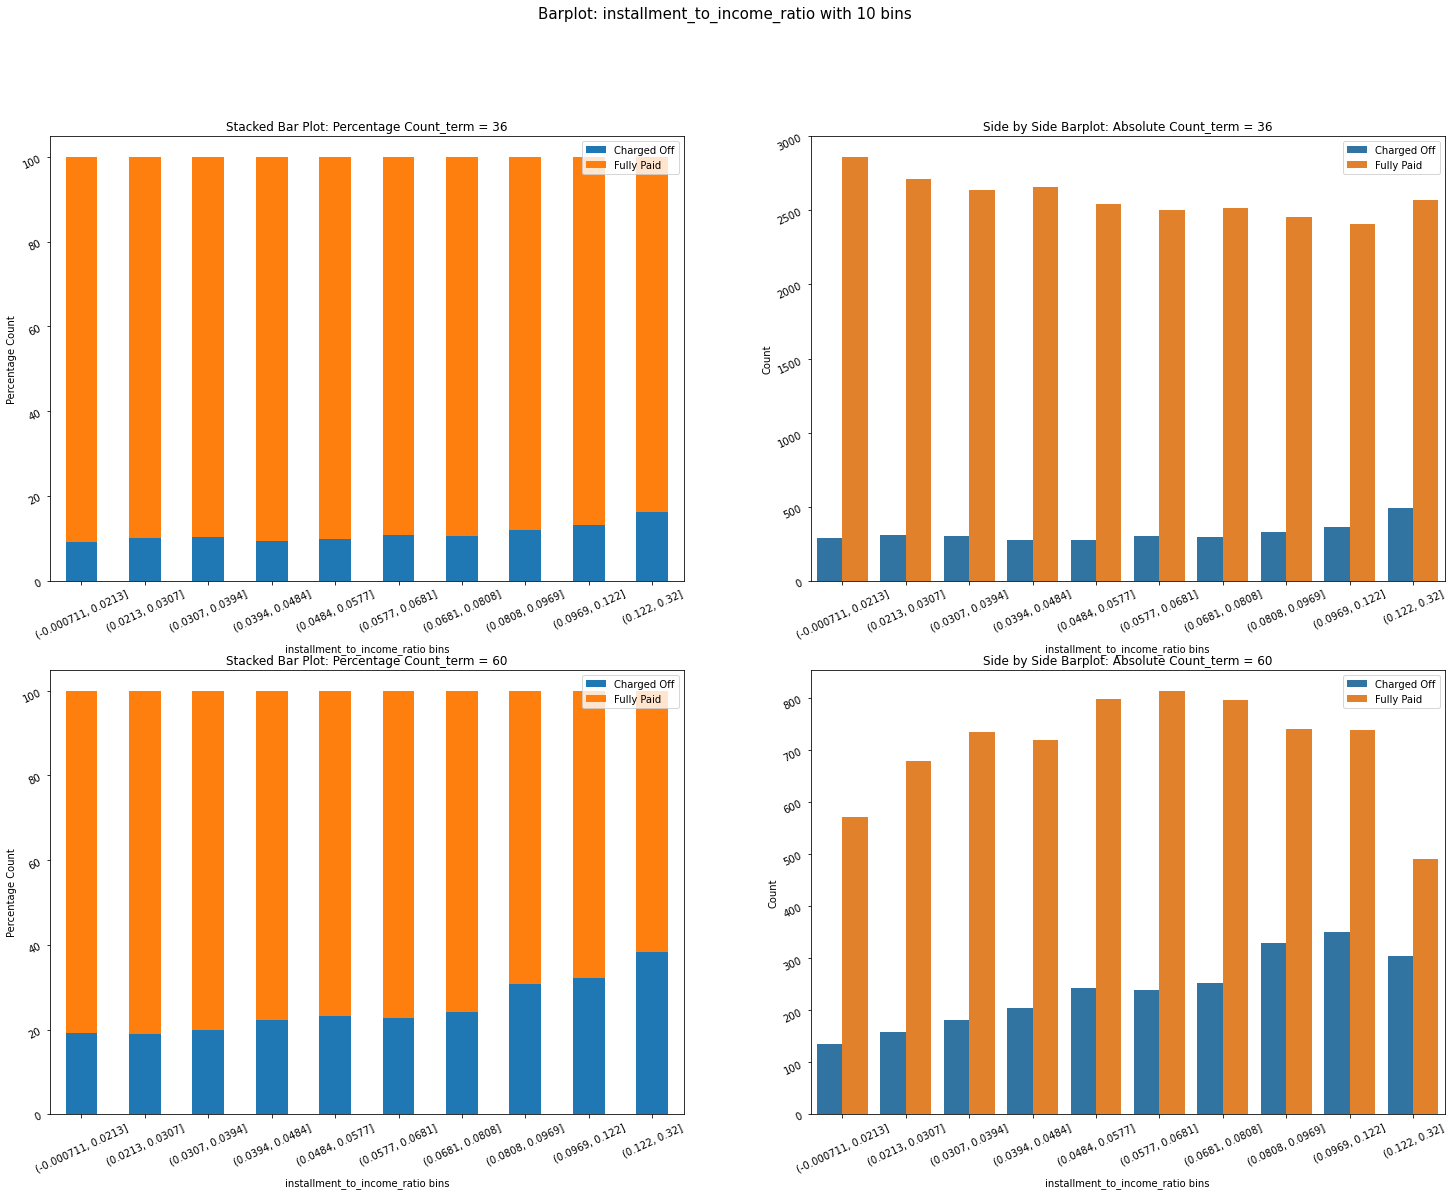

In [523]:
plot_binned_data(data = df_preprocessed, 
                 bins = 10, 
                 binning_column = "installment_to_income_ratio", 
                 multiplot_column="term")

In [368]:
df_preprocessed['term'] = df_preprocessed['term'].astype(str)

<h1>Hypothesis Tests</h1>


- T-tests for target column vs important numeric columns
- Two-way Anova test for combination of categorical-target column vs numeric columns



In [495]:
def ttest(df, column_list):
    results_df = pd.DataFrame()
    for column in column_list:
        series1 = df[df['loan_status'] == 'Fully Paid'][column].dropna().tolist()
        series2 = df[df['loan_status'] == 'Charged Off'][column].dropna().tolist()
#         print(series2,)
        test_statistic, p_value = scipy.stats.ttest_ind(series1, series2, equal_var = True,)
        if results_df.empty:
            results_df['Independent Column'] = [column]
            results_df['Target Column'] = ["loan status"]
            results_df['test_statistic'] = [test_statistic]
            results_df['p-value'] = [p_value]
            results_df['Conclusion'] = ['Statistically Significant' if p_value <= 0.05 else "Insignificant"]
        else:
            results_df.loc[len(results_df)] = [column, "loan status", test_statistic, p_value, ['Statistically Significant' if p_value <= 0.05 else "Insignificant"][0]]
    return results_df
    

In [548]:
column_list = ['loan_to_income_ratio', 'installment_to_income_ratio', "dti", "funded_amnt_inv", "revol_util", "int_rate", "annual_inc", 'inq_last_6mths', 'total_acc']

ttest(df_preprocessed, column_list)

,Independent Column,Target Column,test_statistic,p-value,Conclusion
0,loan_to_income_ratio,loan status,-18.862373,5.279775e-79,Statistically Significant
1,installment_to_income_ratio,loan status,-16.489330,7.077567e-61,Statistically Significant
2,dti,loan status,-8.862512,8.150081e-19,Statistically Significant
3,funded_amnt_inv,loan status,-7.425682,1.145120e-13,Statistically Significant
4,revol_util,loan status,-19.724741,3.525916e-86,Statistically Significant
5,int_rate,loan status,-42.478061,0.000000e+00,Statistically Significant
6,annual_inc,loan status,8.033242,9.760513e-16,Statistically Significant
7,inq_last_6mths,loan status,-14.153784,2.299307e-45,Statistically Significant
8,total_acc,loan status,4.441378,8.963264e-06,Statistically Significant


In [472]:
scipy.stats.ttest_ind([1,2,3], [1,2,3,4, 5])

Ttest_indResult(statistic=-0.9682458365518544, pvalue=0.3703147228597593)

In [484]:
df_preprocessed = df_preprocessed[df_preprocessed['home_ownership'] != "NONE"]

In [486]:
ct = pd.crosstab(df_preprocessed.loan_status, df_preprocessed.home_ownership, margins = True)
ct

home_ownership,MORTGAGE,OTHER,OWN,RENT,All
loan_status,,,,,
Charged Off,2327,18,443,2839,5627
Fully Paid,14694,80,2532,15641,32947
All,17021,98,2975,18480,38574


In [491]:
ct.iloc[1]

home_ownership
MORTGAGE    14694
OTHER          80
OWN          2532
RENT        15641
All         32947
Name: Fully Paid, dtype: int64

In [494]:
obs = np.array([ct.iloc[0][0:-1].values,
                  ct.iloc[1][0:-1].values])
scipy.stats.chi2_contingency(obs)[:3]

(21.719175212338666, 7.46227456328399e-05, 3)

In [ ]:
def chi_sq_test(df, column_list):
    results_df = pd.DataFrame()
    for column in column_list:
        ct = pd.crosstab(df_preprocessed.loan_status, df_preprocessed[column], margins = True)
        obs = np.array([ct.iloc[0][0:-1].values,
                  ct.iloc[1][0:-1].values])
        test_values = scipy.stats.chi2_contingency(obs)[:3]
        

In [549]:
df_preprocessed['revol_util'].isna().sum()

50

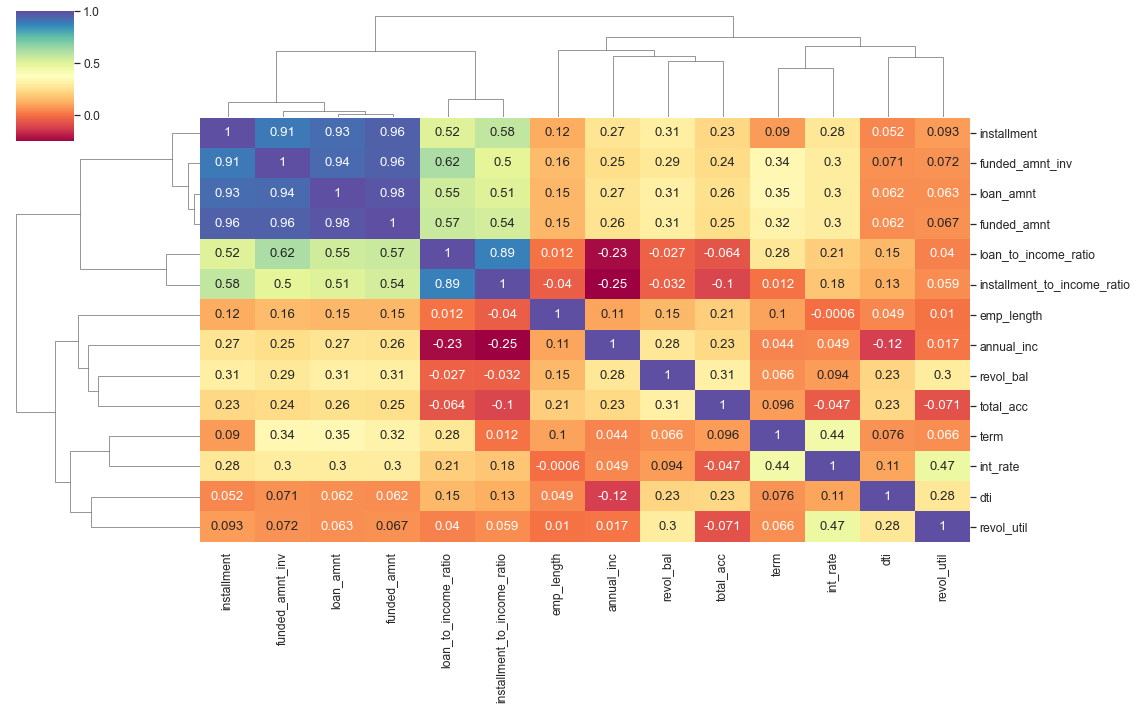

In [575]:
loan_correlation = df_preprocessed.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(16, 10),cmap="Spectral")
plt.show()

In [561]:
df_preprocessed.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'loan_to_income_ratio', 'installment_to_income_ratio'],
      dtype='object')